<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/Tesis_MF_homogeneous.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [41]:
A=pd.read_csv("50_2.csv")

In [52]:
A.head()

,Unnamed: 0,time,S,I,R,time.1,S.1,I.1,R.1,time.2,...,I.48,R.48,time.49,S.49,I.49,R.49,time.50,S.50,I.50,R.50
0,pop_hist,0.000000,199,1,0,0.000000,199,1,0,0.000000,...,1,0,0.000000,199,1,0,0.000000,199,1,0
1,pop,0.250432,198,2,0,0.009002,198,2,0,0.113293,...,2,0,0.006801,198,2,0,0.283796,198,2,0
2,pop,0.295471,198,1,1,0.016022,197,3,0,0.125929,...,3,0,0.007422,197,3,0,0.316249,197,3,0
3,pop,0.315522,197,2,1,0.017986,196,4,0,0.156698,...,4,0,0.009508,196,4,0,0.317807,196,4,0
4,pop,0.317487,196,3,1,0.018111,195,5,0,0.159428,...,5,0,0.009611,195,5,0,0.320204,195,5,0


Unnamed: 0          NaN
time          20.104499
S                     0
I                    21
R                   179
                ...    
R.49                177
time.50       20.417274
S.50                  0
I.50                 25
R.50                175
Name: 385, Length: 205, dtype: object

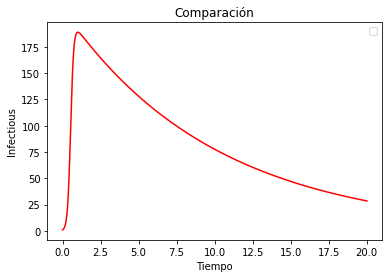

In [65]:
from scipy.integrate import odeint
import scipy.integrate as spi
N=200
k=N-1
def ode_SIR(INP,t,ps): #Codigo hurtado del dropbox.
    try:
        beta = ps['beta'].value
        gamma = ps['gamma'].value
        N = ps['N'].value
    except:
        beta,gamma,N = ps   
    Y = np.zeros((3))
    V = INP    
    Y[0] = - beta * V[0] * V[1] /N
    Y[1] = beta * V[0] * V[1]/N - gamma * V[1] 
    Y[2] = gamma * V[1] 
    return Y
def g(t,INP,ps):
    SOL = spi.odeint(ode_SIR,INPUT,t_range,args=(ps,))
    return SOL[:,1]

N = 200
S0 = N-1
I0 = 1
INPUT = (S0, I0, 0.0)
t_start = 0.0; t_end = 20; t_inc = .01
t_range = np.arange(t_start, t_end+t_inc, t_inc)

plt.figure()
plt.title('Comparación')
plt.plot(t_range,g(t_range,INPUT,[0.05*(k/N)*N,0.1,N]), '-r')
plt.legend(loc=0)
plt.xlabel('Tiempo')
plt.ylabel('Infectious')
plt.show()

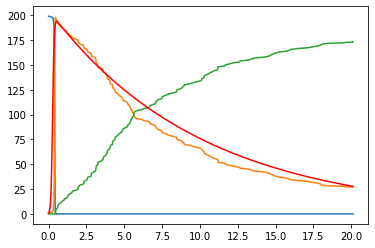

In [66]:
Susc=A['S']/51
Infe=A['I']/51
REc=A['R']/51
for i in range(1,51):
    Susc+=A['S.'+str(i)]/51
    Infe+=A['I.'+str(i)]/51
    REc+=A['R.'+str(i)]/51
plt.plot(A['time'],Susc)
plt.plot(A['time'],Infe)
plt.plot(A['time'],REc)
sir_m=g(t_range,INPUT,[0.05*N,0.1,100])
plt.plot(np.linspace(0,A['time'][385],len(sir_m)),sir_m, '-r')


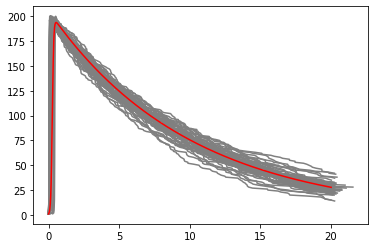

In [67]:
plt.plot(A['time'],A['I'],'gray')
for i in range(1,51):
    Time_i=A['time.'+str(i)]
    Infe_i=A['I.'+str(i)]
    plt.plot(Time_i,Infe_i,'gray')
plt.plot(t_range,sir_m, '-r')
